In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt

# Reliance dataset

In [12]:
df=pd.read_csv('RELIANCE.csv')
df

,date,open,high,low,close,volume,symbol
0,2000-01-03 00:00:00+05:30,45.72,48.45,45.72,48.45,23150255,RELIANCE
1,2000-01-04 00:00:00+05:30,49.74,52.33,48.38,52.33,49287678,RELIANCE
2,2000-01-05 00:00:00+05:30,49.41,55.42,49.41,54.38,139395761,RELIANCE
3,2000-01-06 00:00:00+05:30,55.63,57.88,55.63,56.66,81466421,RELIANCE
4,2000-01-07 00:00:00+05:30,56.79,61.20,56.40,60.55,103225855,RELIANCE
...,...,...,...,...,...,...,...
5805,2023-05-08 00:00:00+05:30,2450.00,2483.65,2444.15,2471.90,4224469,RELIANCE
5806,2023-05-09 00:00:00+05:30,2475.00,2486.80,2463.25,2479.55,2983468,RELIANCE
5807,2023-05-10 00:00:00+05:30,2490.00,2499.85,2481.20,2496.60,5017544,RELIANCE
5808,2023-05-11 00:00:00+05:30,2498.95,2509.50,2476.55,2480.30,4872451,RELIANCE


In [13]:
df1=df[['date','close']]
df1

,date,close
0,2000-01-03 00:00:00+05:30,48.45
1,2000-01-04 00:00:00+05:30,52.33
2,2000-01-05 00:00:00+05:30,54.38
3,2000-01-06 00:00:00+05:30,56.66
4,2000-01-07 00:00:00+05:30,60.55
...,...,...
5805,2023-05-08 00:00:00+05:30,2471.90
5806,2023-05-09 00:00:00+05:30,2479.55
5807,2023-05-10 00:00:00+05:30,2496.60
5808,2023-05-11 00:00:00+05:30,2480.30


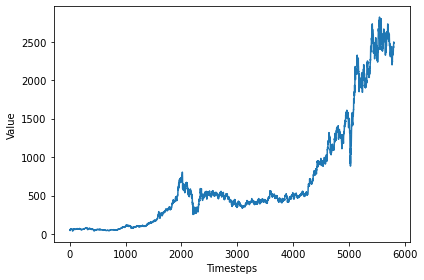

In [14]:
fig, ax = plt.subplots()
ax.plot(df1['close'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

# Lets Check for stationary behaviour of data

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
ADF_result = adfuller(df1['close'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 0.7024129636693597
p-value: 0.9898859015946532


# since adf statistic is less positive and p value is greater than 0.05 the data is non-stationary

# Lets CHeck for Random Walk

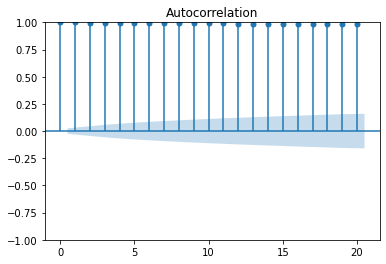

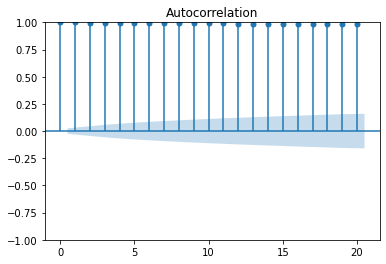

In [17]:
plot_acf(df1['close'], lags=20)

# since the points are outside the shaded region we conclude that autocorrelation is significant hence its not a RANDOM WALk

# Historic Mean

In [18]:
x_train=df1['close'].iloc[:5805]
x_test=df1['close'].iloc[5805:]

In [21]:
new_df=df1[5805:]
new_df['his_mean']=x_train.mean()
new_df

,date,close,his_mean
5805,2023-05-08 00:00:00+05:30,2471.90,674.287525
5806,2023-05-09 00:00:00+05:30,2479.55,674.287525
5807,2023-05-10 00:00:00+05:30,2496.60,674.287525
5808,2023-05-11 00:00:00+05:30,2480.30,674.287525
5809,2023-05-12 00:00:00+05:30,2484.35,674.287525


In [22]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=new_df['close']
y_test=new_df['his_mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 72.84
MSE = 326984264.04
RMSE = 180827.06


# Last Value

In [23]:
x_train=df1['close'][:5805]
a=x_train[-1:].iloc[0]
a

2441.75

In [24]:
last_df=df1[5805:]
last_df['Last_Value']=a
last_df


,date,close,Last_Value
5805,2023-05-08 00:00:00+05:30,2471.90,2441.75
5806,2023-05-09 00:00:00+05:30,2479.55,2441.75
5807,2023-05-10 00:00:00+05:30,2496.60,2441.75
5808,2023-05-11 00:00:00+05:30,2480.30,2441.75
5809,2023-05-12 00:00:00+05:30,2484.35,2441.75


In [25]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=last_df['close']
y_test=last_df['Last_Value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 1.64
MSE = 172944.95
RMSE = 4158.67


# Last Value with next time stamp

In [27]:
x_train=df1['close'][:5805]
a=x_train[-1:].iloc[0]
a

2441.75

In [28]:
next_ts=df1[5805:]
next_ts


,date,close
5805,2023-05-08 00:00:00+05:30,2471.90
5806,2023-05-09 00:00:00+05:30,2479.55
5807,2023-05-10 00:00:00+05:30,2496.60
5808,2023-05-11 00:00:00+05:30,2480.30
5809,2023-05-12 00:00:00+05:30,2484.35


In [29]:
def lagging_column(next_ts, close, lag_periods=1):
    next_ts['next_value'] = next_ts['close'].shift(lag_periods)
    return next_ts

In [30]:
next_ts= lagging_column(next_ts, 'close', lag_periods=1)

In [31]:
next_ts['next_value']=next_ts['next_value'].fillna(a)
next_ts

,date,close,next_value
5805,2023-05-08 00:00:00+05:30,2471.90,2441.75
5806,2023-05-09 00:00:00+05:30,2479.55,2471.90
5807,2023-05-10 00:00:00+05:30,2496.60,2479.55
5808,2023-05-11 00:00:00+05:30,2480.30,2496.60
5809,2023-05-12 00:00:00+05:30,2484.35,2480.30


In [32]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=next_ts['close']
y_test=next_ts['next_value']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 0.61
MSE = 30806.8
RMSE = 1755.19


# MSE has reduced drastically by using last value next time stamp

# Last One Month Mean

In [38]:
x_train=df1['close'][:5805]
a=x_train[5775:].mean()
a

2333.7166666666667

In [39]:
m_df=df1[5805:]
m_df['Month_Mean']=a
m_df

,date,close,Month_Mean
5805,2023-05-08 00:00:00+05:30,2471.90,2333.716667
5806,2023-05-09 00:00:00+05:30,2479.55,2333.716667
5807,2023-05-10 00:00:00+05:30,2496.60,2333.716667
5808,2023-05-11 00:00:00+05:30,2480.30,2333.716667
5809,2023-05-12 00:00:00+05:30,2484.35,2333.716667


In [40]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
y_train=m_df['close']
y_test=m_df['Month_Mean']
print('MAPE =',round(100*mean_absolute_percentage_error(y_train, y_test),2))
print('MSE =',round(100*mean_squared_error(y_train, y_test),2))
print('RMSE =',round(100*(mean_squared_error(y_train, y_test,squared=False)),2))

MAPE = 5.99
MSE = 2221400.99
RMSE = 14904.37


# forecast plotting

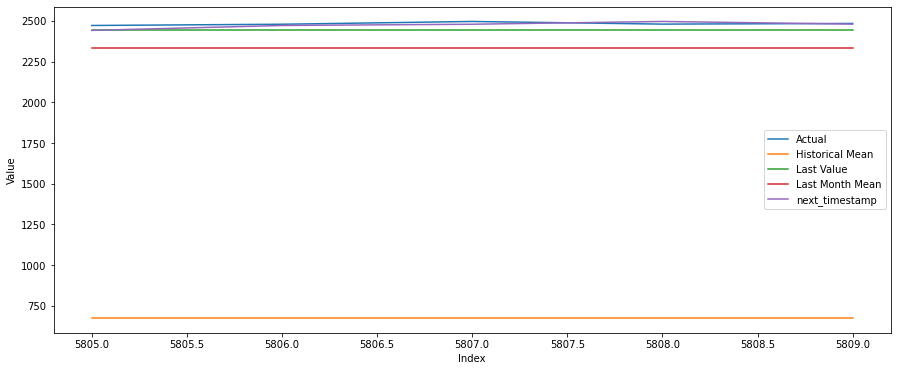

In [41]:
plt.figure(figsize=(15, 6)) 
plt.plot(new_df['close'], label='Actual')
plt.plot(new_df['his_mean'], label='Historical Mean')
plt.plot(last_df['Last_Value'], label='Last Value ')
plt.plot(m_df['Month_Mean'], label='Last Month Mean')
plt.plot(next_ts['next_value'], label='next_timestamp')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()